In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy as sp
import h5py

import holodeck as holo
import holodeck.single_sources as ss
from holodeck.constants import YR, MSOL
from holodeck import utils, detstats, plot


import hasasia.sensitivity as hsen
import hasasia.sim as hsim

# Read in strains from hdf

In [7]:
sspath = '/Users/emigardiner/GWs/holodeck/output/2023-05-09-mbp-ss15_n100_r30_f100_d15_l5_p0/'
hdfname = sspath+'ss_lib.hdf5'
ssfile = h5py.File(hdfname, 'r')
print(list(ssfile.keys()))
hc_ss_all = ssfile['hc_ss'][...]
hc_bg_all = ssfile['hc_bg'][...]
ssfile.close()

['dfobs', 'fit_plaw', 'fit_plaw_med', 'fit_plaw_nbins', 'fit_turn', 'fit_turn_med', 'fit_turn_nbins', 'fobs', 'hc_bg', 'hc_ss', 'pta_cad', 'pta_dur', 'sample_params']
N,F,R,L: (100, 100, 30, 5)


In [12]:
print('N,F,R,L:', hc_ss_all.shape) 
shape = hc_ss_all.shape
N, F, R, L = shape[0], shape[1], shape[2], shape[3]

N,F,R,L: (100, 100, 30, 5)


# Read in detstats

In [15]:
detstats_path = sspath+'/detstats/'

dpname1 = detstats_path+'dp1_psrs40_sigma1e-7/detstats.npz'
dpname2 = detstats_path+'dp2_psrs40_sigma5e-7/detstats.npz'
dpname3 = detstats_path+'dp3_psrs40_sigma1e-6/detstats.npz'
dpnames = np.array([dpname1, dpname2, dpname3])

dpfile1 = np.load(dpname1)
dp_ss1 = dpfile1['dp_ss']
print('N,R,S:', dp_ss1.shape)
S = dp_ss1.shape[-1]

dp_ss_psrs = np.zeros((3,N,R,S))
dp_bg_psrs = np.zeros((3,N,R))
df_ss_psrs = np.zeros((3,N))
df_bg_psrs = np.zeros((3,N))

for ii in range(len(dpnames)):
    dpfile = np.load(dpnames[ii])
    dp_ss_psrs[ii,...] = dpfile['dp_ss']
    dp_bg_psrs[ii,...] = dpfile['dp_bg']
    df_ss_psrs[ii,...] = dpfile['df_ss']
    df_bg_psrs[ii,...] = dpfile['df_bg']
    dpfile.close()

N,R,S: (100, 30, 25)


# Plot

In [19]:
def plot_detprob(dp_ss, dp_bg):
    """ Plot detection probability for many samples.

    Paramaters
    ----------
    dp_ss : (N,R) NDarray
    dp_bg : (N,R,S) NDarray
    """
    fig, ax = plt.subplots(figsize=(6.5,4))
    ax.set_xlabel('Param Space Sample')
    ax.set_ylabel('Detection Probability, $\gamma$')

    nsamp = len(dp_ss)
    ax.errorbar(np.arange(nsamp), np.mean(dp_bg, axis=1), 
                yerr = np.std(dp_bg, axis=1), linestyle='', 
                marker='d', capsize=5, color='cornflowerblue', alpha=0.75,
                label = r'$\langle \gamma_\mathrm{BG} \rangle$')
    ax.errorbar(np.arange(nsamp), np.mean(dp_ss, axis=(1,2)),
                yerr = np.std(dp_ss, axis=(1,2)), linestyle='', 
                marker='o', capsize=5, color='orangered', alpha=0.75,
                label = r'$\langle \gamma_\mathrm{SS} \rangle$')
    ax.set_yscale('log')
    ax.set_title('Average DP across Realizations')

    ax.legend()
    fig.tight_layout()

    return fig


def plot_detfrac(df_ss, df_bg):
    fig, ax = plt.subplots(figsize=(6.5,4))
    ax.plot(np.arange(len(df_bg)), df_bg, color='cornflowerblue', label='BG',
            marker='d')
    ax.plot(np.arange(len(df_ss)), df_ss, color='orangered', label='SS',
            marker='o')
    ax.set_xlabel('Param Space Sample')
    ax.set_ylabel('Detection Fraction')
    ax.set_title('Fraction of Realizations with Detection')
    ax.legend()
    fig.tight_layout()
    return fig


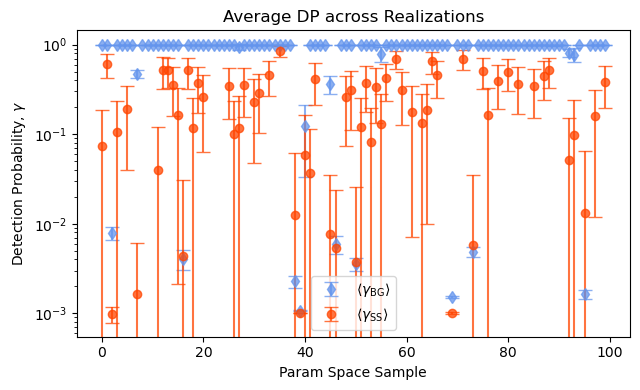

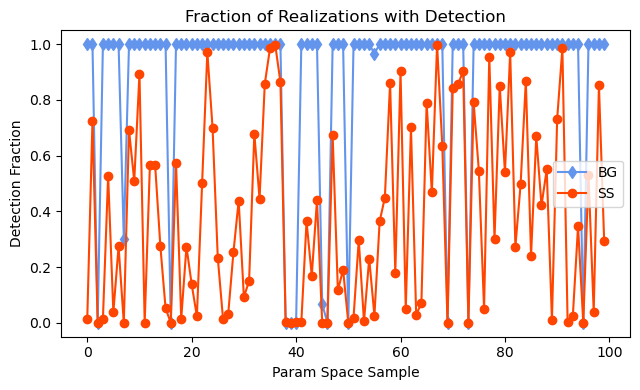

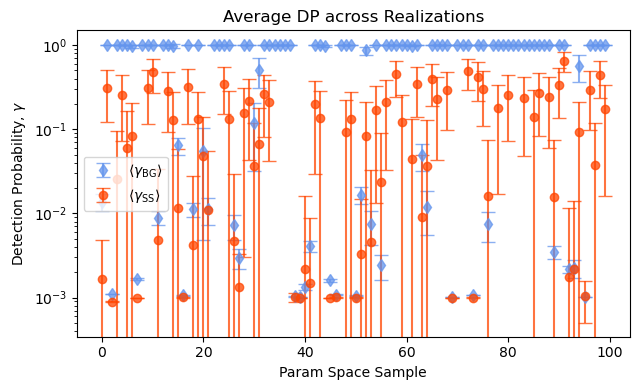

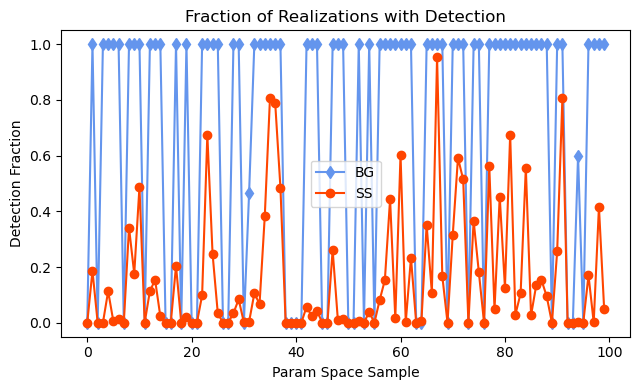

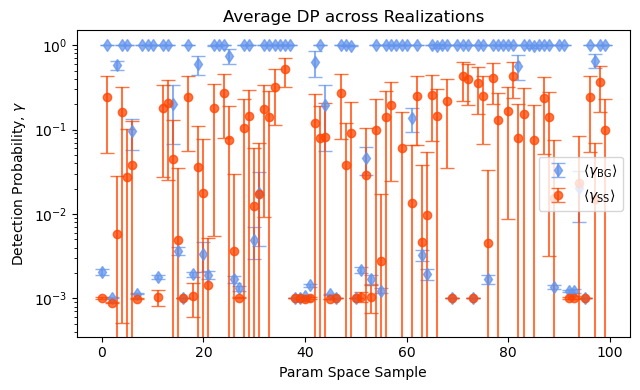

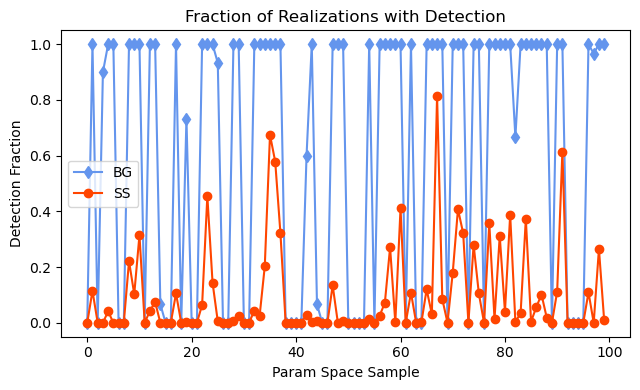

In [20]:
for ii in range(len(dpnames)):
    fig = plot_detprob(dp_ss_psrs[ii], dp_bg_psrs[ii])
    fig = plot_detfrac(df_ss_psrs[ii], df_bg_psrs[ii])